# its_easy サンプルコード

## 旅行パック予約手配依頼書への記入

旅行パック予約手配依頼書の PDF ファイルをダウンロードし、データとして与えられた必要な情報が記入された PDF ファイルを作成します。

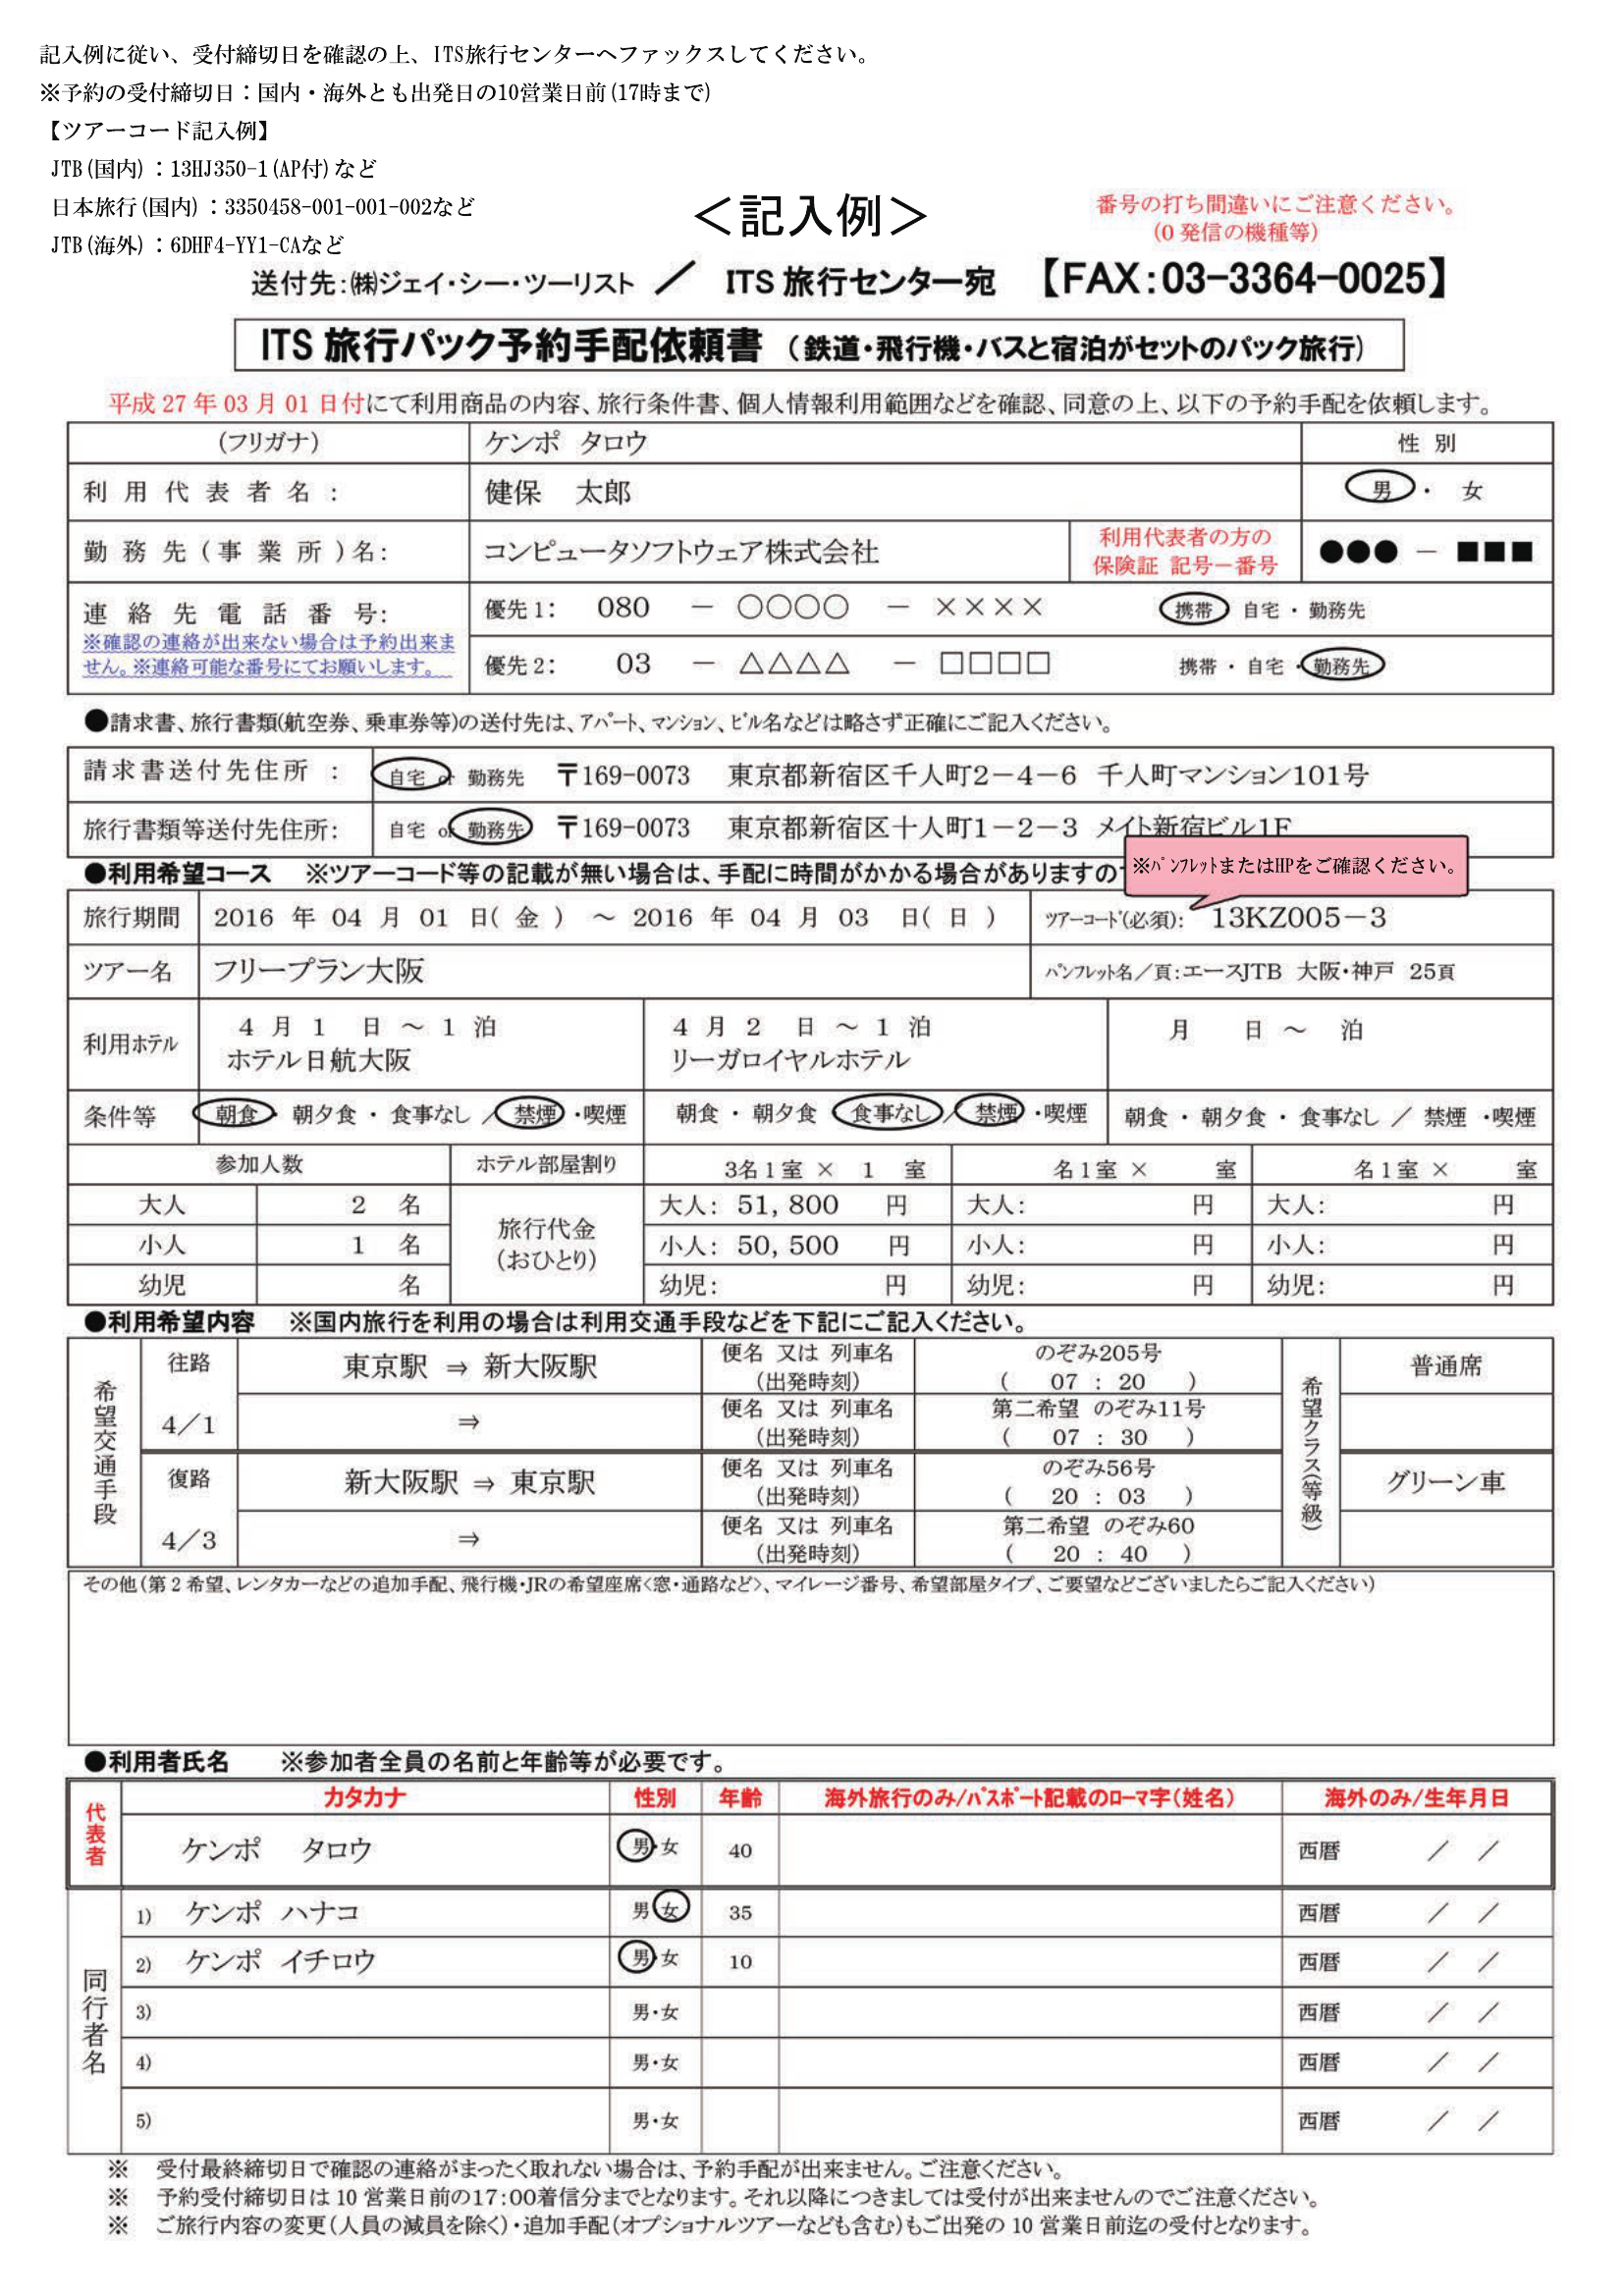

In [1]:
# Download booking request paper PDF file and show it

import requests
import shutil
from pdf2image import convert_from_path

source_pdf_url = 'http://www.jc-tourist.co.jp/travel/itspack/skycontents/2013info/201106_tehaisho.pdf'
source_pdf_file = './201106_tehaisho.pdf'

res = requests.get(source_pdf_url, stream=True)

with open(source_pdf_file, 'wb') as f_out:
    shutil.copyfileobj(res.raw, f_out)

images = convert_from_path(source_pdf_file, first_page=2, last_page=2)
images[0]

In [3]:
# Prepare info to book
# It can be dict, YAML doc or YAML file path

booking_data = {
    '利用代表者': {
        '利用代表者名': '健保 太郎',
        'フリガナ': 'ケンポ タロウ',
        '性別': '男',
        '勤務先名': '株式会社○△□',
        '代表利用者の方の保険証': {
            '記号': 1234,
            '番号': 56
        },
        '連絡先電話番号': [
            {'番号': '090-1234-5678', '種別': '携帯'},
            {'番号': '0123-45-6789', '種別': '自宅'}
        ]
    }
}


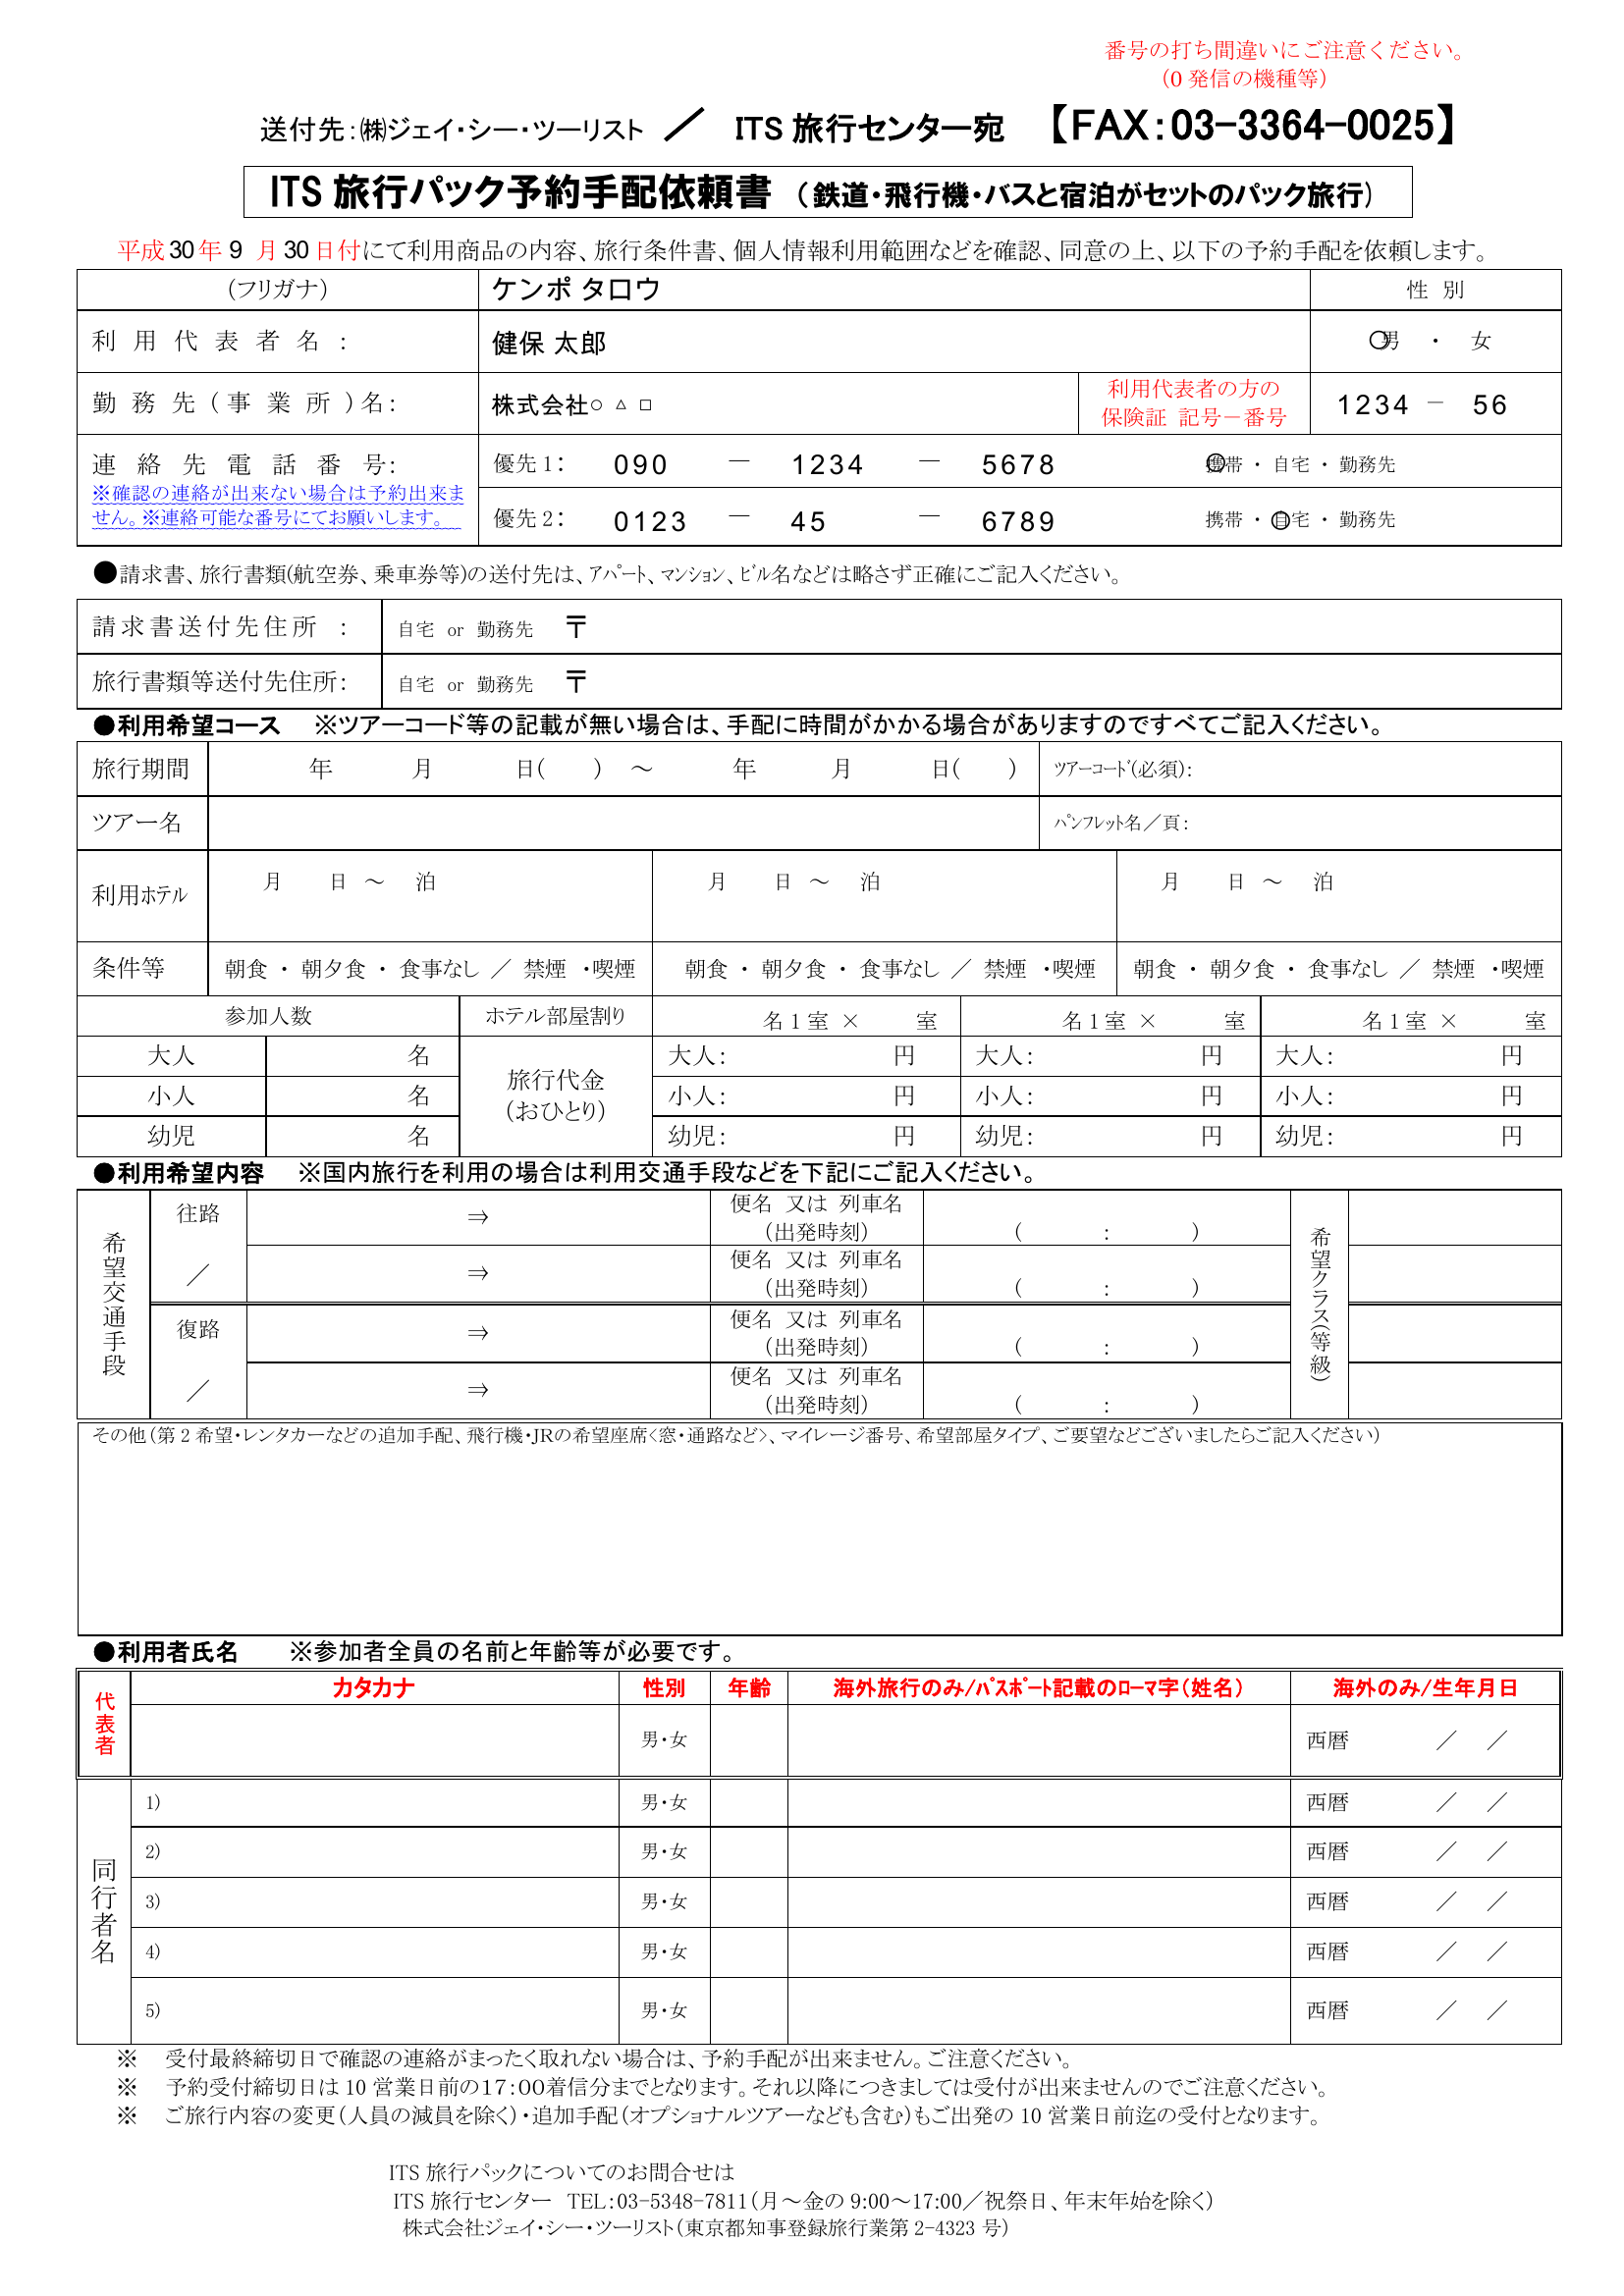

In [5]:
# Write info to book and create new PDF file

from its_easy.tour import add_info_on_booking_request_paper

out_pdf_file = './out.pdf'
add_info_on_booking_request_paper(source_pdf_file, out_pdf_file, booking_data)

images = convert_from_path(out_pdf_file)
images[0]
